<a href="https://colab.research.google.com/github/Melisacid/Regresionlineal/blob/main/A_6_1_mexico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("data_clean_df_mexico.csv")
df.head()

<ipython-input-2-1aaf7ce4658c>:1: DtypeWarning: Columns (1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("data_clean_df_mexico.csv")


,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
0,0.0,2056638,20230329041210,10531228,3.0,7.0,19.35353,-99.16299,3.0,1.0,...,Entire loft,Entire home/apt,1.5 baths,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...",1434.0,t,2023-03-30,2014-01-03,2018-06-24,f
1,1.0,2072354,20230329041210,16840050,3.0,3.0,19.35358,-99.16948,2.0,1.0,...,Entire guest suite,Entire home/apt,1 bath,"[""Free street parking"", ""Cleaning products"", ""...",830.0,t,2023-03-30,2014-01-01,2022-11-04,f
2,2.0,696037,20230329041210,3531879,4.0,4.0,19.4418,-99.18402,6.0,3.0,...,Entire rental unit,Entire home/apt,2 baths,"[""Wifi \u2013 38 Mbps"", ""Central air condition...",1469.0,t,2023-03-29,2012-10-31,2022-12-21,f
3,3.0,35797,20230329041210,153786,1.0,1.0,19.38283,-99.2,2.0,1.0,...,Entire villa,Entire home/apt,1 bath,"[""Wifi"", ""Washer"", ""BBQ grill"", ""Indoor firepl...",3658.0,t,2023-03-29,2012-10-31,2022-12-21,f
4,4.0,44616,20230329041210,196253,16.0,16.0,19.41162,-99.17794,3.1,1.5,...,Entire home,Entire home/apt,5.5 baths,"[""Free street parking"", ""Security cameras on p...",18000.0,t,2023-03-30,2011-11-09,2023-03-26,f


In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df.isnull().sum().sum()
valores_nulos

144

In [ ]:
#No se porque sale que hay nulos si en el archivo del pais dice que hay 0 nulos
#para que no haya errores todos los nulos los reemplazo con bfill
df.fillna(method='bfill', inplace=True)

In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df.isnull().sum().sum()
valores_nulos

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24226 entries, 0 to 24225
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    24226 non-null  float64
 1   id                                            24226 non-null  object 
 2   scrape_id                                     24226 non-null  object 
 3   host_id                                       24226 non-null  int64  
 4   host_listings_count                           24226 non-null  object 
 5   host_total_listings_count                     24226 non-null  object 
 6   latitude                                      24226 non-null  object 
 7   longitude                                     24226 non-null  object 
 8   accommodates                                  24226 non-null  object 
 9   bedrooms                                      24226 non-null 

 Analizar la correlación que existe en cada tipo de habitación (Elegir 2 tipos) respecto a las variables siguientes en el siguiente orden “(dependiente, independiente)”, utilizando Python y Google Colab, obtener los datos y gráficos requeridos en cada caso.

# **Habitación: private room**


## “host_acceptance_rate vs host_response_rate”

In [ ]:
# Filtrar los datos para obtener solo los tipos de habitación "Entire home/apt" y "Hotel room"
private_room = df[df['room_type'] == 'Private room']

In [ ]:
#Cambiar datos
private_room['host_response_rate'] = private_room['host_response_rate'].astype(str)  
private_room['host_response_rate'] = private_room['host_response_rate'].str.replace('%', '')  
private_room['host_response_rate'] = pd.to_numeric(private_room['host_response_rate'], errors='coerce')

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

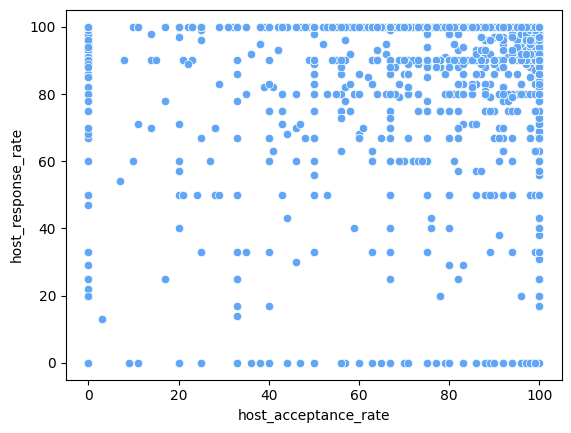

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate',color="#60A6F5",data=private_room)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['host_acceptance_rate']]
Var_Dep= private_room['host_response_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.31860453]),
 'rank_': 1,
 'singular_': array([2310.98860415]),
 'intercept_': 63.19839327080372}

modelo matemático: y= 0.31860453x + 63.19839327080372

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.11940465395747701

In [ ]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['host_acceptance_rate']])
y_pred

array([95.05884638, 63.19839327, 63.19839327, ..., 95.05884638,
       95.05884638, 93.78442826])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones', y_pred)
private_room.head()

,Predicciones,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
7,95.058846,7.0,61792,20230329041210,299558,2.0,3.0,19.41083,-99.18057,2.0,...,Private room in home,Private room,1 shared bath,"[""Heating - split type ductless system"", ""Whir...",1089.0,t,2023-03-30,2017-11-01,2022-12-31,f
16,63.198393,16.0,760912,20230329041210,3817743,1.0,1.0,19.40891,-99.16083,2.0,...,Private room in rental unit,Private room,1.5 baths,"[""Wifi"", ""Washer"", ""Kitchen"", ""TV with standar...",726.0,t,2023-03-30,2012-12-18,2016-01-30,f
17,63.198393,17.0,2088218,20230329041210,10659485,1.0,2.0,19.34022,-99.15306,1.0,...,Private room in home,Private room,1.5 baths,"[""Wifi"", ""Iron"", ""Washer"", ""Pets allowed"", ""Ha...",375.0,t,2023-03-30,2014-01-07,2018-05-15,f
18,63.198393,18.0,2093036,20230329041210,3083561,1.0,2.0,19.44178,-99.20202,2.0,...,Private room in rental unit,Private room,1 bath,"[""Elevator"", ""Heating"", ""Wifi"", ""Washer"", ""Pet...",2835.0,t,2023-03-29,2014-01-07,2018-05-15,f
21,94.740242,21.0,131610,20230329041210,647454,3.0,4.0,19.35416,-99.16488,2.0,...,Private room,Private room,1 private bath,"[""Patio or balcony"", ""Wifi"", ""Breakfast"", ""Lug...",1244.0,t,2023-03-29,2014-09-06,2023-01-29,f


<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

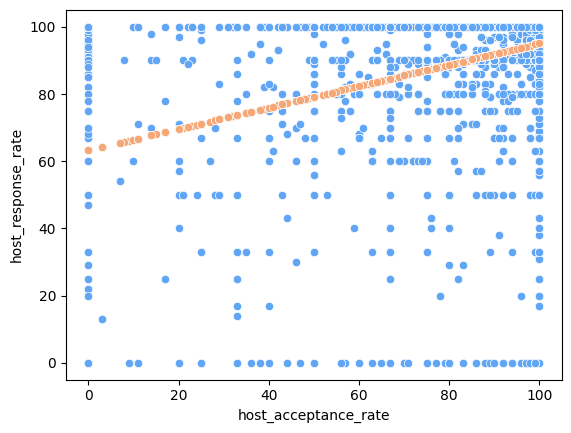

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="#60A6F5", data=private_room)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="#F5A778", data=private_room)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.11940465395747701
Coeficiente de correlación:  0.34554978506356654


## **“host_acceptance_rate vs price”**

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

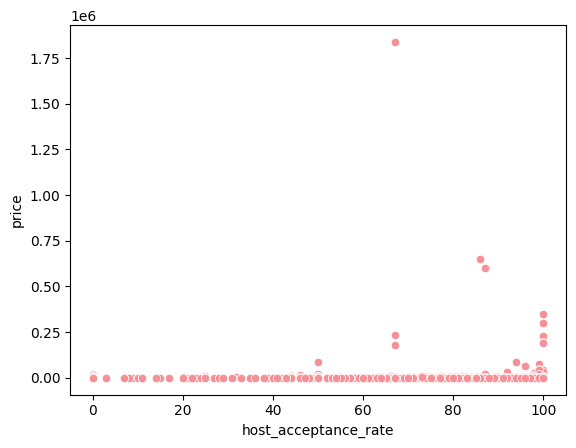

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='price',color="#F59097",data=private_room)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['host_acceptance_rate']]
Var_Dep= private_room['price']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-4.00636755]),
 'rank_': 1,
 'singular_': array([2310.98860415]),
 'intercept_': 1858.2283681904064}

modelo matemático: y= -4.00636755x + 1858.2283681904064

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

1.835929093674249e-05

In [ ]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['host_acceptance_rate']])
y_pred

array([1457.59161305, 1858.22836819, 1858.22836819, ..., 1457.59161305,
       1457.59161305, 1473.61708326])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones2', y_pred)
private_room.head()

,Predicciones2,Predicciones,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
7,1457.591613,95.058846,7.0,61792,20230329041210,299558,2.0,3.0,19.41083,-99.18057,...,Private room in home,Private room,1 shared bath,"[""Heating - split type ductless system"", ""Whir...",1089.0,t,2023-03-30,2017-11-01,2022-12-31,f
16,1858.228368,63.198393,16.0,760912,20230329041210,3817743,1.0,1.0,19.40891,-99.16083,...,Private room in rental unit,Private room,1.5 baths,"[""Wifi"", ""Washer"", ""Kitchen"", ""TV with standar...",726.0,t,2023-03-30,2012-12-18,2016-01-30,f
17,1858.228368,63.198393,17.0,2088218,20230329041210,10659485,1.0,2.0,19.34022,-99.15306,...,Private room in home,Private room,1.5 baths,"[""Wifi"", ""Iron"", ""Washer"", ""Pets allowed"", ""Ha...",375.0,t,2023-03-30,2014-01-07,2018-05-15,f
18,1858.228368,63.198393,18.0,2093036,20230329041210,3083561,1.0,2.0,19.44178,-99.20202,...,Private room in rental unit,Private room,1 bath,"[""Elevator"", ""Heating"", ""Wifi"", ""Washer"", ""Pet...",2835.0,t,2023-03-29,2014-01-07,2018-05-15,f
21,1461.597981,94.740242,21.0,131610,20230329041210,647454,3.0,4.0,19.35416,-99.16488,...,Private room,Private room,1 private bath,"[""Patio or balcony"", ""Wifi"", ""Breakfast"", ""Lug...",1244.0,t,2023-03-29,2014-09-06,2023-01-29,f


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

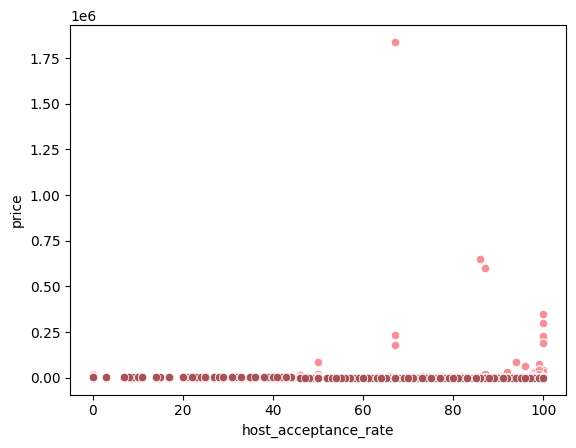

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='price', color="#F59097", data=private_room)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones2', color="#A85258", data=private_room)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  1.835929093674249e-05
Coeficiente de correlación:  0.00428477431573035


## **“host_acceptance_rate vs number_of_reviews”**

<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

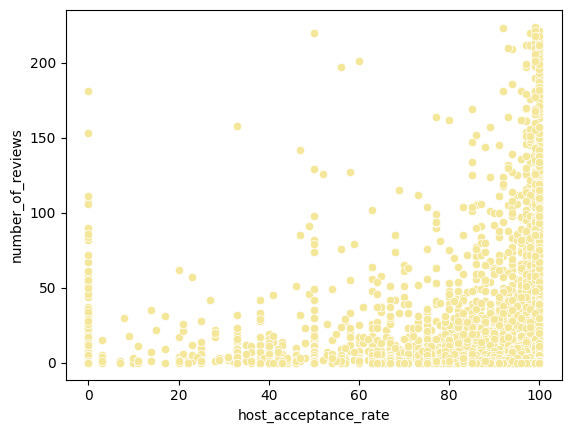

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews',color="#F5E79A",data=private_room)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['host_acceptance_rate']]
Var_Dep= private_room['number_of_reviews']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.20931094]),
 'rank_': 1,
 'singular_': array([2310.98860415]),
 'intercept_': 2.6556575984023816}

Modelo matemático: y= 0.20931094x + 2.6556575984023816

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.02250062120894114

In [ ]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['host_acceptance_rate']])
y_pred

array([23.58675147,  2.6556576 ,  2.6556576 , ..., 23.58675147,
       23.58675147, 22.74950772])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones3', y_pred)
private_room.head()

,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
7,23.586751,1457.591613,95.058846,7.0,61792,20230329041210,299558,2.0,3.0,19.41083,...,Private room in home,Private room,1 shared bath,"[""Heating - split type ductless system"", ""Whir...",1089.0,t,2023-03-30,2017-11-01,2022-12-31,f
16,2.655658,1858.228368,63.198393,16.0,760912,20230329041210,3817743,1.0,1.0,19.40891,...,Private room in rental unit,Private room,1.5 baths,"[""Wifi"", ""Washer"", ""Kitchen"", ""TV with standar...",726.0,t,2023-03-30,2012-12-18,2016-01-30,f
17,2.655658,1858.228368,63.198393,17.0,2088218,20230329041210,10659485,1.0,2.0,19.34022,...,Private room in home,Private room,1.5 baths,"[""Wifi"", ""Iron"", ""Washer"", ""Pets allowed"", ""Ha...",375.0,t,2023-03-30,2014-01-07,2018-05-15,f
18,2.655658,1858.228368,63.198393,18.0,2093036,20230329041210,3083561,1.0,2.0,19.44178,...,Private room in rental unit,Private room,1 bath,"[""Elevator"", ""Heating"", ""Wifi"", ""Washer"", ""Pet...",2835.0,t,2023-03-29,2014-01-07,2018-05-15,f
21,23.377441,1461.597981,94.740242,21.0,131610,20230329041210,647454,3.0,4.0,19.35416,...,Private room,Private room,1 private bath,"[""Patio or balcony"", ""Wifi"", ""Breakfast"", ""Lug...",1244.0,t,2023-03-29,2014-09-06,2023-01-29,f


<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

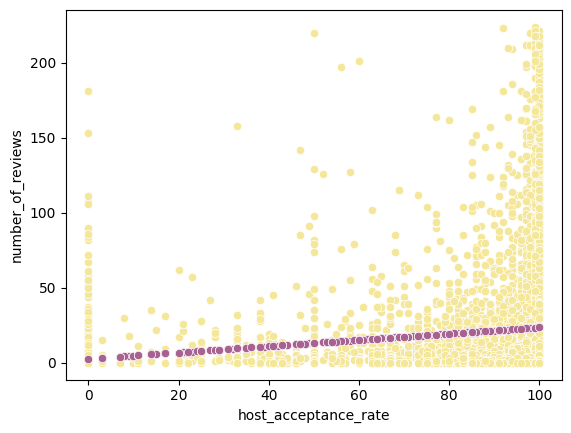

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews', color="#F5E79A", data=private_room)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones3', color="#A86291", data=private_room)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.02250062120894114
Coeficiente de correlación:  0.15000207068217805


## **“review_scores_location vs review_scores_cleanliness**

<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

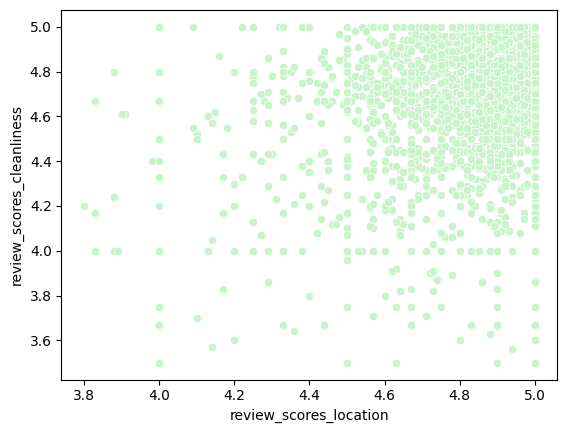

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness',color="#C9F3C8", data=private_room)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['review_scores_location']]
Var_Dep= private_room['review_scores_cleanliness']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_location'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.47346807]),
 'rank_': 1,
 'singular_': array([16.43126817]),
 'intercept_': 2.462303032940758}

Modelo matemático: y=  0.47346807x + 2.462303032940758

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.12232968622362594

In [ ]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['review_scores_location']])
y_pred

array([4.80123531, 4.73494978, 4.54556255, ..., 4.73494978, 4.73494978,
       4.73494978])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones4', y_pred)
private_room.head()

,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
7,4.801235,23.586751,1457.591613,95.058846,7.0,61792,20230329041210,299558,2.0,3.0,...,Private room in home,Private room,1 shared bath,"[""Heating - split type ductless system"", ""Whir...",1089.0,t,2023-03-30,2017-11-01,2022-12-31,f
16,4.734950,2.655658,1858.228368,63.198393,16.0,760912,20230329041210,3817743,1.0,1.0,...,Private room in rental unit,Private room,1.5 baths,"[""Wifi"", ""Washer"", ""Kitchen"", ""TV with standar...",726.0,t,2023-03-30,2012-12-18,2016-01-30,f
17,4.545563,2.655658,1858.228368,63.198393,17.0,2088218,20230329041210,10659485,1.0,2.0,...,Private room in home,Private room,1.5 baths,"[""Wifi"", ""Iron"", ""Washer"", ""Pets allowed"", ""Ha...",375.0,t,2023-03-30,2014-01-07,2018-05-15,f
18,4.734950,2.655658,1858.228368,63.198393,18.0,2093036,20230329041210,3083561,1.0,2.0,...,Private room in rental unit,Private room,1 bath,"[""Elevator"", ""Heating"", ""Wifi"", ""Washer"", ""Pet...",2835.0,t,2023-03-29,2014-01-07,2018-05-15,f
21,4.734950,23.377441,1461.597981,94.740242,21.0,131610,20230329041210,647454,3.0,4.0,...,Private room,Private room,1 private bath,"[""Patio or balcony"", ""Wifi"", ""Breakfast"", ""Lug...",1244.0,t,2023-03-29,2014-09-06,2023-01-29,f


<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

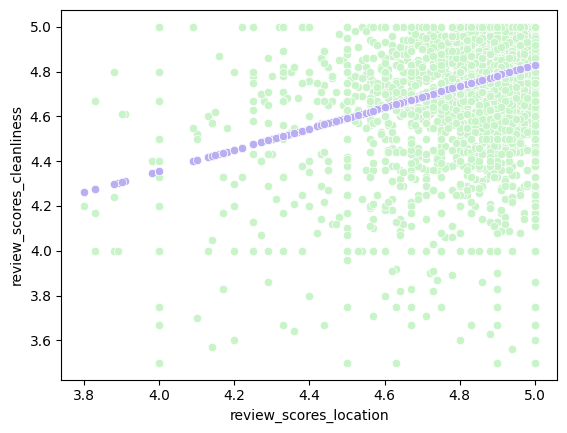

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness', color="#C9F3C8", data=private_room)
sns.scatterplot(x='review_scores_location', y='Predicciones4', color="#BAAEF2", data=private_room)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.12232968622362594
Coeficiente de correlación:  0.3497566099784619


## **“availability_365 vs number_of_reviews”**

In [ ]:
private_room = private_room.astype({"availability_365": int, "number_of_reviews": int})


<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

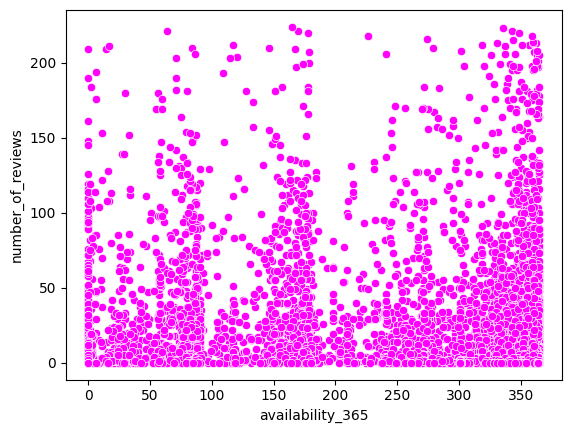

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='availability_365', y='number_of_reviews',color="magenta",data=private_room)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['availability_365']]
Var_Dep= private_room['number_of_reviews']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.01733386]),
 'rank_': 1,
 'singular_': array([11332.98357803]),
 'intercept_': 25.31532399955901}

Modelo matemático: y= -0.01733386x + 25.31532399955901

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.0037116100504094307

In [ ]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['availability_365']])
y_pred

array([22.40323635, 19.02313461, 20.39250916, ..., 19.335144  ,
       19.00580075, 22.19523009])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones5365', y_pred)
private_room.head()

,Predicciones5365,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,id,scrape_id,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
7,22.403236,4.847544,22.415467,4.801235,23.586751,1457.591613,95.058846,7.0,61792,20230329041210,...,Private room in home,Private room,1 shared bath,"[""Heating - split type ductless system"", ""Whir...",1089.0,t,2023-03-30,2017-11-01,2022-12-31,f
16,19.023135,4.860038,19.034386,4.734950,2.655658,1858.228368,63.198393,16.0,760912,20230329041210,...,Private room in rental unit,Private room,1.5 baths,"[""Wifi"", ""Washer"", ""Kitchen"", ""TV with standar...",726.0,t,2023-03-30,2012-12-18,2016-01-30,f
17,20.392509,4.860038,20.404157,4.545563,2.655658,1858.228368,63.198393,17.0,2088218,20230329041210,...,Private room in home,Private room,1.5 baths,"[""Wifi"", ""Iron"", ""Washer"", ""Pets allowed"", ""Ha...",375.0,t,2023-03-30,2014-01-07,2018-05-15,f
18,18.988467,4.836994,18.999708,4.734950,2.655658,1858.228368,63.198393,18.0,2093036,20230329041210,...,Private room in rental unit,Private room,1 bath,"[""Elevator"", ""Heating"", ""Wifi"", ""Washer"", ""Pet...",2835.0,t,2023-03-29,2014-01-07,2018-05-15,f
21,23.789945,4.836994,23.802577,4.734950,23.377441,1461.597981,94.740242,21.0,131610,20230329041210,...,Private room,Private room,1 private bath,"[""Patio or balcony"", ""Wifi"", ""Breakfast"", ""Lug...",1244.0,t,2023-03-29,2014-09-06,2023-01-29,f


<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

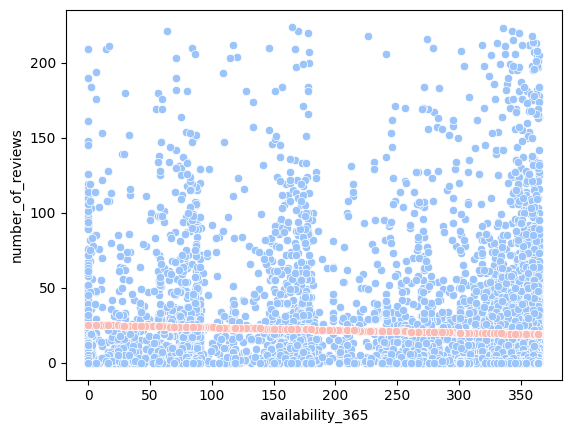

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='availability_365', y='number_of_reviews', color="#9AC4FA", data=private_room)
sns.scatterplot(x='availability_365', y='Predicciones5365', color="#FABBB4", data=private_room)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.0037116100504094307
Coeficiente de correlación:  0.060922984582252954


## **“reviews_per_month vs review_scores_communication”**

<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

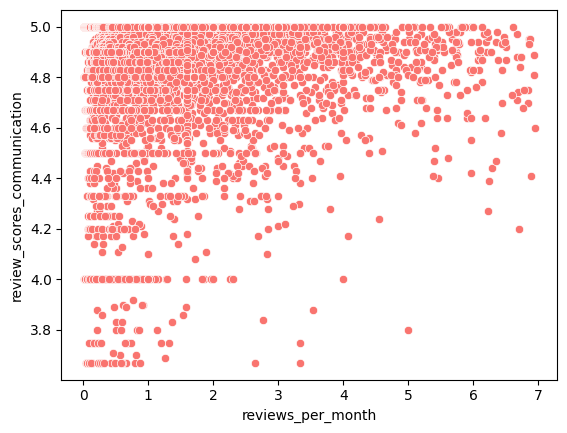

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='reviews_per_month', y='review_scores_communication',color="#F9746F",data=private_room)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['reviews_per_month']]
Var_Dep= private_room['review_scores_communication']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.01388154]),
 'rank_': 1,
 'singular_': array([105.53321574]),
 'intercept_': 4.860592949318457}

Modelo matemático: y= -0.01388154x + 4.860592949318457

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.006161369222422164

In [ ]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['reviews_per_month']])
y_pred

array([4.84754431, 4.86003769, 4.86003769, ..., 4.83699434, 4.83699434,
       4.83699434])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones6', y_pred)
private_room.head()

,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,id,scrape_id,host_id,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
7,4.847544,22.415467,4.801235,23.586751,1457.591613,95.058846,7.0,61792,20230329041210,299558,...,Private room in home,Private room,1 shared bath,"[""Heating - split type ductless system"", ""Whir...",1089.0,t,2023-03-30,2017-11-01,2022-12-31,f
16,4.860038,19.034386,4.734950,2.655658,1858.228368,63.198393,16.0,760912,20230329041210,3817743,...,Private room in rental unit,Private room,1.5 baths,"[""Wifi"", ""Washer"", ""Kitchen"", ""TV with standar...",726.0,t,2023-03-30,2012-12-18,2016-01-30,f
17,4.860038,20.404157,4.545563,2.655658,1858.228368,63.198393,17.0,2088218,20230329041210,10659485,...,Private room in home,Private room,1.5 baths,"[""Wifi"", ""Iron"", ""Washer"", ""Pets allowed"", ""Ha...",375.0,t,2023-03-30,2014-01-07,2018-05-15,f
18,4.836994,18.999708,4.734950,2.655658,1858.228368,63.198393,18.0,2093036,20230329041210,3083561,...,Private room in rental unit,Private room,1 bath,"[""Elevator"", ""Heating"", ""Wifi"", ""Washer"", ""Pet...",2835.0,t,2023-03-29,2014-01-07,2018-05-15,f
21,4.836994,23.802577,4.734950,23.377441,1461.597981,94.740242,21.0,131610,20230329041210,647454,...,Private room,Private room,1 private bath,"[""Patio or balcony"", ""Wifi"", ""Breakfast"", ""Lug...",1244.0,t,2023-03-29,2014-09-06,2023-01-29,f


<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

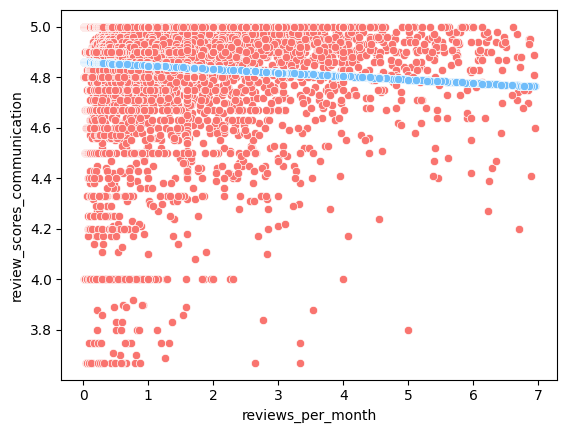

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='reviews_per_month', y='review_scores_communication', color="#F9746F", data=private_room)
sns.scatterplot(x='reviews_per_month', y='Predicciones6', color="#70BDFA", data=private_room)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.006161369222422164
Coeficiente de correlación:  0.07849438975125651


In [ ]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors=private_room.corr()
Corr_Factors

<ipython-input-100-5346aab0bab6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors=private_room.corr()


,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,host_id,minimum_nights_avg_ntm,number_of_reviews,...,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,price
Predicciones6,1.000000,0.061882,0.055305,-0.161390,0.161390,-0.161390,-0.266289,-0.147660,0.086521,-0.401126,...,0.055305,0.042838,-0.143705,-0.126790,-0.135984,0.038911,-1.000000,-0.106920,-0.161390,0.006772
Predicciones5,0.061882,1.000000,0.071262,-0.024043,0.024043,-0.024043,-0.169115,-0.159246,0.015678,0.060936,...,0.071262,0.108309,-0.115069,-0.059488,-0.086629,-0.014650,-0.061882,0.014811,-0.024043,0.006670
Predicciones4,0.055305,0.071262,1.000000,0.009904,-0.009904,0.009904,-0.078557,-0.106622,0.011488,0.086002,...,1.000000,0.414443,-0.037313,-0.025622,-0.034485,-0.035159,-0.055305,0.019055,0.009904,0.004461
Predicciones3,-0.161390,-0.024043,0.009904,1.000000,-1.000000,1.000000,0.209560,0.149964,-0.086770,0.150002,...,0.009904,-0.033920,0.146079,0.095502,0.207878,-0.000056,0.161390,0.345550,1.000000,-0.004285
Predicciones2,0.161390,0.024043,-0.009904,-1.000000,1.000000,-1.000000,-0.209560,-0.149964,0.086770,-0.150002,...,-0.009904,0.033920,-0.146079,-0.095502,-0.207878,0.000056,-0.161390,-0.345550,-1.000000,0.004285
Predicciones,-0.161390,-0.024043,0.009904,1.000000,-1.000000,1.000000,0.209560,0.149964,-0.086770,0.150002,...,0.009904,-0.033920,0.146079,0.095502,0.207878,-0.000056,0.161390,0.345550,1.000000,-0.004285
Unnamed: 0,-0.266289,-0.169115,-0.078557,0.209560,-0.209560,0.209560,1.000000,0.466640,-0.085733,-0.315566,...,-0.078557,-0.082769,0.214583,0.157505,0.121007,-0.023222,0.266289,0.101717,0.209560,0.002240
host_id,-0.147660,-0.159246,-0.106622,0.149964,-0.149964,0.149964,0.466640,1.000000,-0.065806,-0.153639,...,-0.106622,-0.100286,0.113027,0.053008,0.026657,-0.010851,0.147660,0.001084,0.149964,-0.007362
minimum_nights_avg_ntm,0.086521,0.015678,0.011488,-0.086770,0.086770,-0.086770,-0.085733,-0.065806,1.000000,-0.112710,...,0.011488,0.010709,-0.043875,-0.052194,-0.111460,-0.026992,-0.086521,-0.095301,-0.086770,-0.003064
number_of_reviews,-0.401126,0.060936,0.086002,0.150002,-0.150002,0.150002,-0.315566,-0.153639,-0.112710,1.000000,...,0.086002,0.068439,0.016288,0.011123,0.110964,-0.023069,0.401126,0.138380,0.150002,0.002973


In [ ]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,host_id,minimum_nights_avg_ntm,number_of_reviews,...,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,price
Predicciones6,1.000000,0.061882,0.055305,0.161390,0.161390,0.161390,0.266289,0.147660,0.086521,0.401126,...,0.055305,0.042838,0.143705,0.126790,0.135984,0.038911,1.000000,0.106920,0.161390,0.006772
Predicciones5,0.061882,1.000000,0.071262,0.024043,0.024043,0.024043,0.169115,0.159246,0.015678,0.060936,...,0.071262,0.108309,0.115069,0.059488,0.086629,0.014650,0.061882,0.014811,0.024043,0.006670
Predicciones4,0.055305,0.071262,1.000000,0.009904,0.009904,0.009904,0.078557,0.106622,0.011488,0.086002,...,1.000000,0.414443,0.037313,0.025622,0.034485,0.035159,0.055305,0.019055,0.009904,0.004461
Predicciones3,0.161390,0.024043,0.009904,1.000000,1.000000,1.000000,0.209560,0.149964,0.086770,0.150002,...,0.009904,0.033920,0.146079,0.095502,0.207878,0.000056,0.161390,0.345550,1.000000,0.004285
Predicciones2,0.161390,0.024043,0.009904,1.000000,1.000000,1.000000,0.209560,0.149964,0.086770,0.150002,...,0.009904,0.033920,0.146079,0.095502,0.207878,0.000056,0.161390,0.345550,1.000000,0.004285
Predicciones,0.161390,0.024043,0.009904,1.000000,1.000000,1.000000,0.209560,0.149964,0.086770,0.150002,...,0.009904,0.033920,0.146079,0.095502,0.207878,0.000056,0.161390,0.345550,1.000000,0.004285
Unnamed: 0,0.266289,0.169115,0.078557,0.209560,0.209560,0.209560,1.000000,0.466640,0.085733,0.315566,...,0.078557,0.082769,0.214583,0.157505,0.121007,0.023222,0.266289,0.101717,0.209560,0.002240
host_id,0.147660,0.159246,0.106622,0.149964,0.149964,0.149964,0.466640,1.000000,0.065806,0.153639,...,0.106622,0.100286,0.113027,0.053008,0.026657,0.010851,0.147660,0.001084,0.149964,0.007362
minimum_nights_avg_ntm,0.086521,0.015678,0.011488,0.086770,0.086770,0.086770,0.085733,0.065806,1.000000,0.112710,...,0.011488,0.010709,0.043875,0.052194,0.111460,0.026992,0.086521,0.095301,0.086770,0.003064
number_of_reviews,0.401126,0.060936,0.086002,0.150002,0.150002,0.150002,0.315566,0.153639,0.112710,1.000000,...,0.086002,0.068439,0.016288,0.011123,0.110964,0.023069,0.401126,0.138380,0.150002,0.002973


<Axes: >

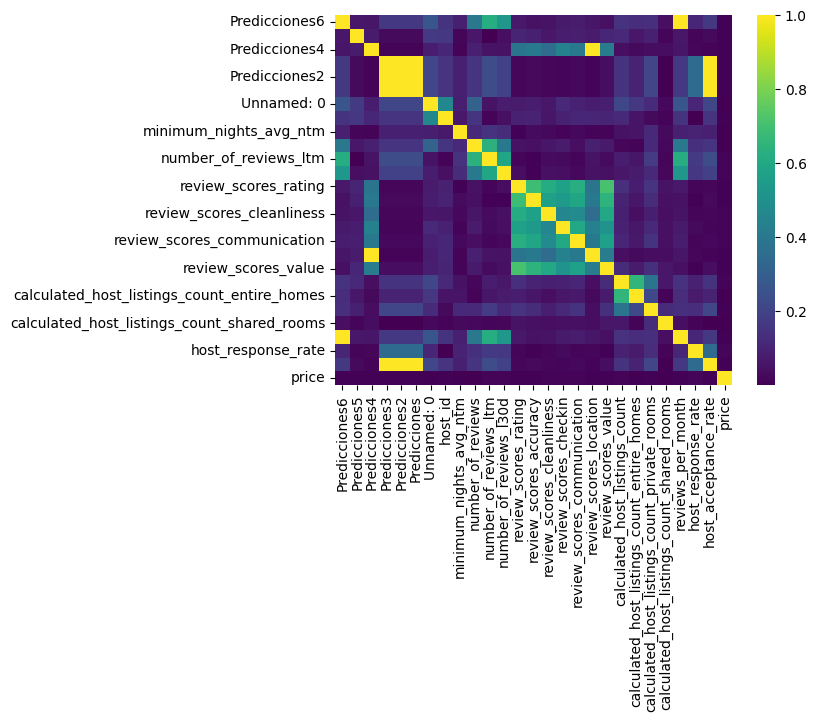

In [ ]:
#Graficamos el mapa de calor de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'viridis')  
Heat_Map

<Axes: >

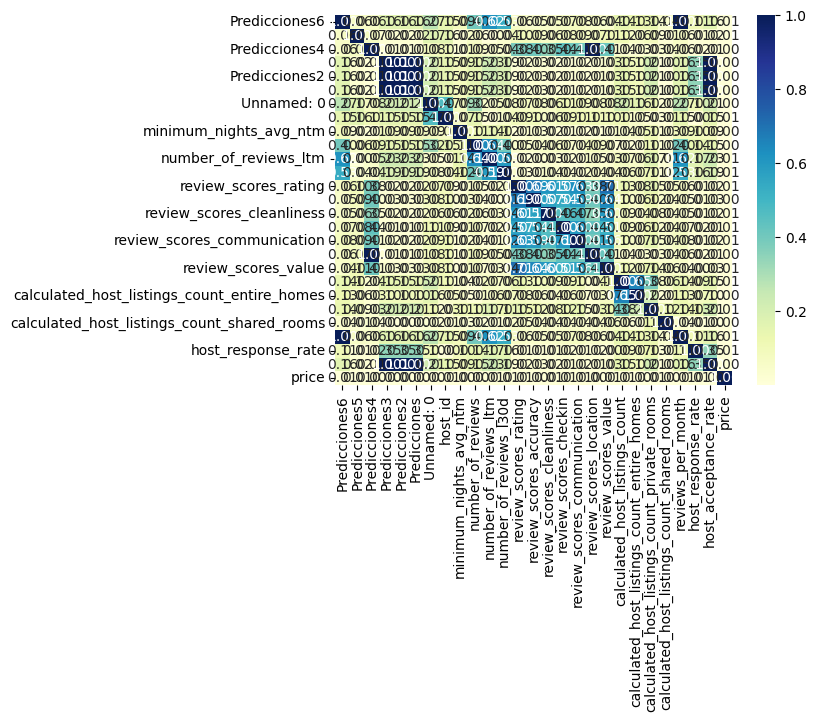

In [ ]:
#Ajustamos el mapa de calor de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

# **Tipo de habitación: hotel room**

In [ ]:
df= pd.read_csv("data_clean_df_mexico.csv")
df.head()

<ipython-input-105-1aaf7ce4658c>:1: DtypeWarning: Columns (1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("data_clean_df_mexico.csv")


,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
0,0.0,2056638,20230329041210,10531228,3.0,7.0,19.35353,-99.16299,3.0,1.0,...,Entire loft,Entire home/apt,1.5 baths,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...",1434.0,t,2023-03-30,2014-01-03,2018-06-24,f
1,1.0,2072354,20230329041210,16840050,3.0,3.0,19.35358,-99.16948,2.0,1.0,...,Entire guest suite,Entire home/apt,1 bath,"[""Free street parking"", ""Cleaning products"", ""...",830.0,t,2023-03-30,2014-01-01,2022-11-04,f
2,2.0,696037,20230329041210,3531879,4.0,4.0,19.4418,-99.18402,6.0,3.0,...,Entire rental unit,Entire home/apt,2 baths,"[""Wifi \u2013 38 Mbps"", ""Central air condition...",1469.0,t,2023-03-29,2012-10-31,2022-12-21,f
3,3.0,35797,20230329041210,153786,1.0,1.0,19.38283,-99.2,2.0,1.0,...,Entire villa,Entire home/apt,1 bath,"[""Wifi"", ""Washer"", ""BBQ grill"", ""Indoor firepl...",3658.0,t,2023-03-29,2012-10-31,2022-12-21,f
4,4.0,44616,20230329041210,196253,16.0,16.0,19.41162,-99.17794,3.1,1.5,...,Entire home,Entire home/apt,5.5 baths,"[""Free street parking"", ""Security cameras on p...",18000.0,t,2023-03-30,2011-11-09,2023-03-26,f


In [ ]:
#No se porque sale que hay nulos si en el archivo del pais dice que hay 0 nulos
#para que no haya errores todos los nulos los reemplazo con bfill
df.fillna(method='bfill', inplace=True)

In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df.isnull().sum().sum()
valores_nulos

0

##**“host_acceptance_rate vs host_response_rate”**

In [ ]:
hotel = df[df['room_type'] == 'Hotel room']

In [ ]:
#Cambiar datos['host_response_rate'].astype(str)  
hotel['host_response_rate'] = hotel['host_response_rate'].str.replace('%', '')  
hotel['host_response_rate'] = pd.to_numeric(hotel['host_response_rate'], errors='coerce') 

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

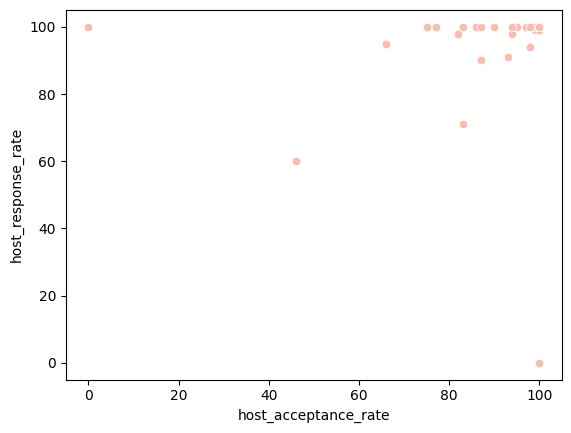

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate',color="#F9BCB0",data=hotel)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= hotel[['host_acceptance_rate']]
Var_Dep= hotel['host_response_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.21393851]),
 'rank_': 1,
 'singular_': array([189.38699288]),
 'intercept_': 77.04630349203673}

Modelo matemático: y= 0.21393851x +  77.04630349203673

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.09073258846332644

In [ ]:
#Predecimos los valores de total 
y_pred= model.predict(X=hotel[['host_acceptance_rate']])
y_pred

array([95.65895388, 95.65895388, 95.65895388, 95.65895388, 95.44501537,
       95.44501537, 97.15652345, 97.15652345, 98.226216  , 91.16624517,
       97.15652345, 91.16624517, 91.16624517, 98.44015451, 98.44015451,
       98.44015451, 98.01227749, 98.44015451, 94.80319984, 96.94258494,
       91.16624517, 98.44015451, 98.44015451, 97.37046196, 98.44015451,
       98.44015451, 98.44015451, 98.44015451, 98.44015451, 98.44015451,
       97.79833898, 98.44015451, 98.44015451, 98.44015451, 98.44015451,
       98.01227749, 94.80319984, 98.44015451, 98.44015451, 94.58926133,
       94.58926133, 98.44015451, 98.44015451, 94.80319984, 98.44015451,
       98.44015451, 98.44015451, 98.44015451, 98.44015451, 98.44015451,
       98.44015451, 98.44015451, 98.44015451, 98.44015451, 98.44015451,
       98.44015451, 98.44015451, 98.44015451, 93.09169176, 98.44015451,
       98.44015451, 98.44015451, 98.44015451, 98.44015451, 98.44015451,
       98.44015451, 98.44015451, 98.44015451, 93.09169176, 98.44

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
hotel.insert(0, 'Predicciones', y_pred)
hotel.head()

,Predicciones,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
14,95.658954,14.0,737328,20230329041210,3850198,19.0,21.0,19.43059,-99.17073,2.0,...,Room in serviced apartment,Hotel room,1 bath,"[""Smoke alarm"", ""Luggage dropoff allowed"", ""Lo...",1006.0,t,2023-03-29,2013-01-05,2022-03-20,t
53,95.658954,53.0,865012,20230329041210,3850198,19.0,21.0,19.43078,-99.17011,2.0,...,Room in serviced apartment,Hotel room,1 bath,"[""Smoke alarm"", ""TV with standard cable"", ""Hos...",1006.0,t,2023-03-29,2013-03-02,2022-01-01,t
55,95.658954,55.0,868843,20230329041210,3850198,19.0,21.0,19.43068,-99.17007,2.0,...,Room in serviced apartment,Hotel room,1 bath,"[""Smoke alarm"", ""Luggage dropoff allowed"", ""Lo...",908.0,t,2023-03-30,2014-08-03,2023-03-22,t
62,95.658954,62.0,869063,20230329041210,3850198,19.0,21.0,19.43052,-99.17003,2.0,...,Room in serviced apartment,Hotel room,1 bath,"[""Smoke alarm"", ""Luggage dropoff allowed"", ""Lo...",908.0,t,2023-03-30,2016-01-05,2023-01-13,t
66,95.445015,66.0,281134,20230329041210,196253,16.0,16.0,19.41108,-99.17634,3.0,...,Room in serviced apartment,Hotel room,1 private bath,"[""Free street parking"", ""TV with standard cabl...",3162.0,t,2023-03-30,2015-01-05,2019-10-05,t


<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

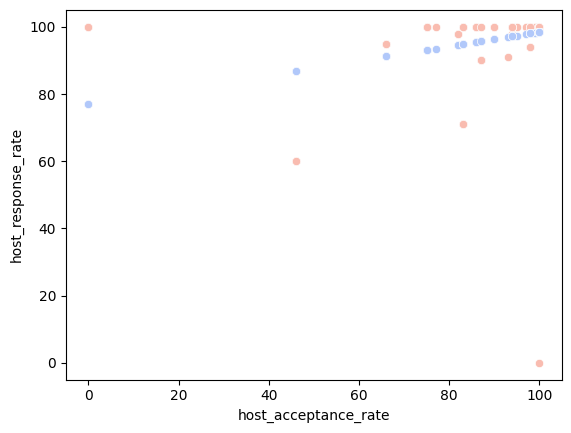

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="#F9BCB0", data=hotel)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="#B1C8FA", data=hotel)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.09073258846332644
Coeficiente de correlación:  0.30121850617670626


## **“host_acceptance_rate vs price”**

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

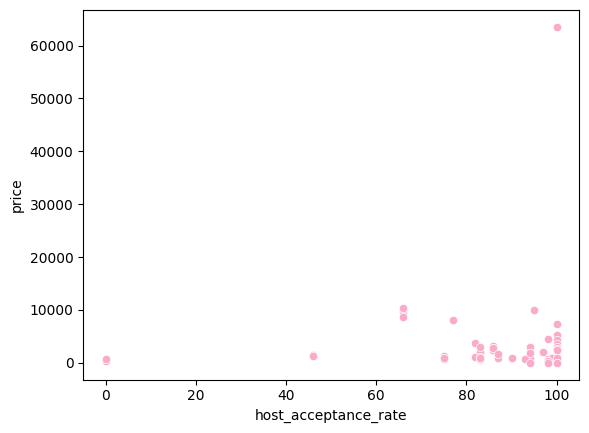

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='price',color="#F9ABC9",data=hotel)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= hotel[['host_acceptance_rate']]
Var_Dep= hotel['price']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.93102861]),
 'rank_': 1,
 'singular_': array([189.38699288]),
 'intercept_': 2540.8091300335177}

Modelo matematico: y= -0.93102861x + 2540.8091300335177

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

7.239885347565256e-06

In [ ]:
#Predecimos los valores de total 
y_pred= model.predict(X=hotel[['host_acceptance_rate']])
y_pred

array([2459.8096411 , 2459.8096411 , 2459.8096411 , 2459.8096411 ,
       2460.74066971, 2460.74066971, 2453.29244084, 2453.29244084,
       2448.6372978 , 2479.36124188, 2453.29244084, 2479.36124188,
       2479.36124188, 2447.70626919, 2447.70626919, 2447.70626919,
       2449.56832641, 2447.70626919, 2463.53375554, 2454.22346945,
       2479.36124188, 2447.70626919, 2447.70626919, 2452.36141223,
       2447.70626919, 2447.70626919, 2447.70626919, 2447.70626919,
       2447.70626919, 2447.70626919, 2450.49935502, 2447.70626919,
       2447.70626919, 2447.70626919, 2447.70626919, 2449.56832641,
       2463.53375554, 2447.70626919, 2447.70626919, 2464.46478414,
       2464.46478414, 2447.70626919, 2447.70626919, 2463.53375554,
       2447.70626919, 2447.70626919, 2447.70626919, 2447.70626919,
       2447.70626919, 2447.70626919, 2447.70626919, 2447.70626919,
       2447.70626919, 2447.70626919, 2447.70626919, 2447.70626919,
       2447.70626919, 2447.70626919, 2470.9819844 , 2447.70626

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
hotel.insert(0, 'Predicciones2', y_pred)
hotel.head()

,Predicciones2,Predicciones,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
14,2459.809641,95.658954,14.0,737328,20230329041210,3850198,19.0,21.0,19.43059,-99.17073,...,Room in serviced apartment,Hotel room,1 bath,"[""Smoke alarm"", ""Luggage dropoff allowed"", ""Lo...",1006.0,t,2023-03-29,2013-01-05,2022-03-20,t
53,2459.809641,95.658954,53.0,865012,20230329041210,3850198,19.0,21.0,19.43078,-99.17011,...,Room in serviced apartment,Hotel room,1 bath,"[""Smoke alarm"", ""TV with standard cable"", ""Hos...",1006.0,t,2023-03-29,2013-03-02,2022-01-01,t
55,2459.809641,95.658954,55.0,868843,20230329041210,3850198,19.0,21.0,19.43068,-99.17007,...,Room in serviced apartment,Hotel room,1 bath,"[""Smoke alarm"", ""Luggage dropoff allowed"", ""Lo...",908.0,t,2023-03-30,2014-08-03,2023-03-22,t
62,2459.809641,95.658954,62.0,869063,20230329041210,3850198,19.0,21.0,19.43052,-99.17003,...,Room in serviced apartment,Hotel room,1 bath,"[""Smoke alarm"", ""Luggage dropoff allowed"", ""Lo...",908.0,t,2023-03-30,2016-01-05,2023-01-13,t
66,2460.740670,95.445015,66.0,281134,20230329041210,196253,16.0,16.0,19.41108,-99.17634,...,Room in serviced apartment,Hotel room,1 private bath,"[""Free street parking"", ""TV with standard cabl...",3162.0,t,2023-03-30,2015-01-05,2019-10-05,t


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

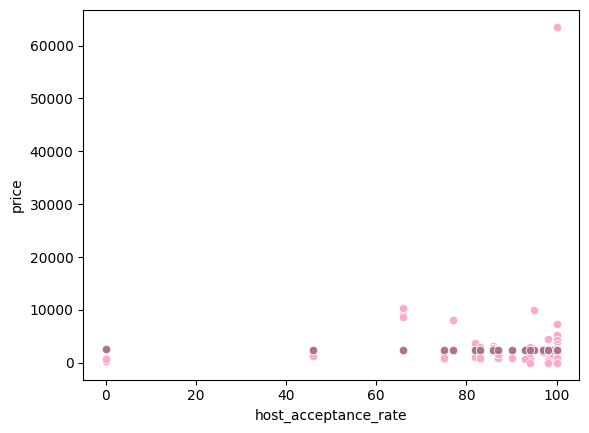

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='price', color="#F9ABC9", data=hotel)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones2', color="#AD7289", data=hotel)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  7.239885347565256e-06
Coeficiente de correlación:  0.002690703504209495


## **“host_acceptance_rate vs number_of_reviews”**

<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

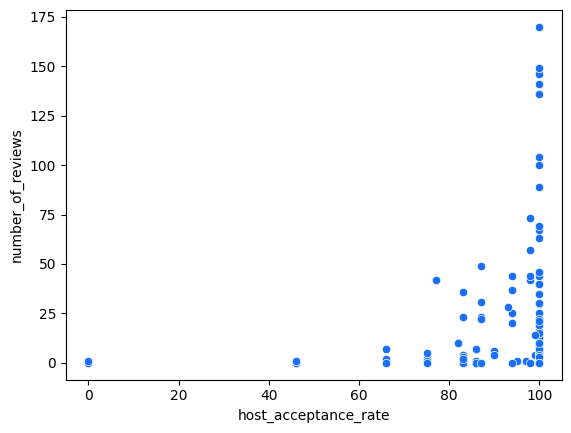

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews',color="#196EFA",data=hotel)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= hotel[['host_acceptance_rate']]
Var_Dep= hotel['number_of_reviews']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.42929115]),
 'rank_': 1,
 'singular_': array([189.38699288]),
 'intercept_': -19.408077689409204}

Modelo matemático: y= 0.42929115x + -19.408077689409204

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.045985820138967015

In [ ]:
#Predecimos los valores de total 
y_pred= model.predict(X=hotel[['host_acceptance_rate']])
y_pred

array([ 17.94025251,  17.94025251,  17.94025251,  17.94025251,
        17.51096136,  17.51096136,  20.94529058,  20.94529058,
        23.09174633,   8.92513833,  20.94529058,   8.92513833,
         8.92513833,  23.52103749,  23.52103749,  23.52103749,
        22.66245518,  23.52103749,  16.22308791,  20.51599942,
         8.92513833,  23.52103749,  23.52103749,  21.37458173,
        23.52103749,  23.52103749,  23.52103749,  23.52103749,
        23.52103749,  23.52103749,  22.23316403,  23.52103749,
        23.52103749,  23.52103749,  23.52103749,  22.66245518,
        16.22308791,  23.52103749,  23.52103749,  15.79379675,
        15.79379675,  23.52103749,  23.52103749,  16.22308791,
        23.52103749,  23.52103749,  23.52103749,  23.52103749,
        23.52103749,  23.52103749,  23.52103749,  23.52103749,
        23.52103749,  23.52103749,  23.52103749,  23.52103749,
        23.52103749,  23.52103749,  12.78875869,  23.52103749,
        23.52103749,  23.52103749,  23.52103749,  23.52

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
hotel.insert(0, 'Predicciones3', y_pred)
hotel.head()

,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
14,17.940253,2459.809641,95.658954,14.0,737328,20230329041210,3850198,19.0,21.0,19.43059,...,Room in serviced apartment,Hotel room,1 bath,"[""Smoke alarm"", ""Luggage dropoff allowed"", ""Lo...",1006.0,t,2023-03-29,2013-01-05,2022-03-20,t
53,17.940253,2459.809641,95.658954,53.0,865012,20230329041210,3850198,19.0,21.0,19.43078,...,Room in serviced apartment,Hotel room,1 bath,"[""Smoke alarm"", ""TV with standard cable"", ""Hos...",1006.0,t,2023-03-29,2013-03-02,2022-01-01,t
55,17.940253,2459.809641,95.658954,55.0,868843,20230329041210,3850198,19.0,21.0,19.43068,...,Room in serviced apartment,Hotel room,1 bath,"[""Smoke alarm"", ""Luggage dropoff allowed"", ""Lo...",908.0,t,2023-03-30,2014-08-03,2023-03-22,t
62,17.940253,2459.809641,95.658954,62.0,869063,20230329041210,3850198,19.0,21.0,19.43052,...,Room in serviced apartment,Hotel room,1 bath,"[""Smoke alarm"", ""Luggage dropoff allowed"", ""Lo...",908.0,t,2023-03-30,2016-01-05,2023-01-13,t
66,17.510961,2460.740670,95.445015,66.0,281134,20230329041210,196253,16.0,16.0,19.41108,...,Room in serviced apartment,Hotel room,1 private bath,"[""Free street parking"", ""TV with standard cabl...",3162.0,t,2023-03-30,2015-01-05,2019-10-05,t


<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

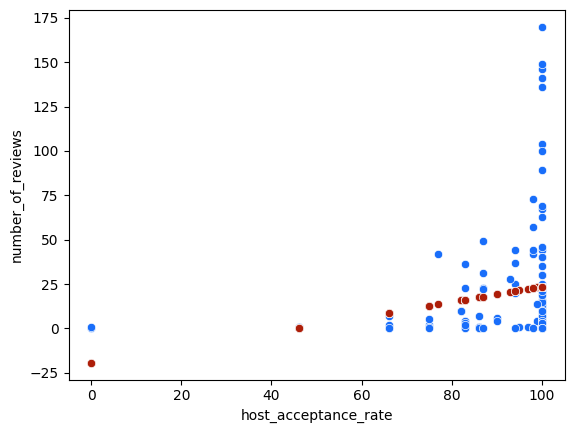

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews', color="#196EFA", data=hotel)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones3', color="#AD1E09", data=hotel)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.045985820138967015
Coeficiente de correlación:  0.21444304637587813


## **“review_scores_location vs review_scores_cleanliness"**

<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

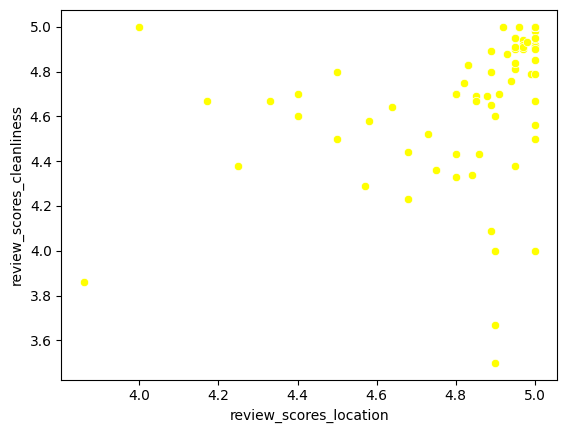

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness',color="yellow", data=hotel)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= hotel[['review_scores_location']]
Var_Dep= hotel['review_scores_cleanliness']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_location'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.60035852]),
 'rank_': 1,
 'singular_': array([2.25709799]),
 'intercept_': 1.8377685763409146}

Modelo matemático: y= 0.60035852x + 1.8377685763409146

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.1813199356585351

In [ ]:
#Predecimos los valores de total 
y_pred= model.predict(X=hotel[['review_scores_location']])
y_pred

array([4.73750021, 4.8215504 , 4.83956116, 4.80954323, 4.83956116,
       4.83956116, 4.79153248, 4.80954323, 4.83956116, 4.15515245,
       4.8215504 , 4.71948945, 4.83956116, 4.83956116, 4.83956116,
       4.83956116, 4.80954323, 4.80954323, 4.78552889, 4.73149662,
       4.71948945, 4.83956116, 4.83355757, 4.83956116, 4.80353965,
       4.77352172, 4.83956116, 4.58741058, 4.76751813, 4.83956116,
       4.83956116, 4.74950738, 4.80954323, 4.8215504 , 4.77352172,
       4.80954323, 4.7795253 , 4.71948945, 4.71948945, 4.83956116,
       4.5393819 , 4.83956116, 4.79753606, 4.83956116, 4.47934605,
       4.83956116, 4.38929227, 4.34126359, 4.75551096, 4.7795253 ,
       4.7795253 , 4.47934605, 4.83956116, 4.23920264, 4.83956116,
       4.71948945, 4.8215504 , 4.83956116, 4.83956116, 4.83956116,
       4.81554682, 4.58140699, 4.74350379, 4.77352172, 4.64744643,
       4.68947153, 4.64744643, 4.74950738, 4.83956116, 4.71948945,
       4.71948945, 4.83956116, 4.83956116, 4.71948945, 4.62343

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
hotel.insert(0, 'Predicciones4', y_pred)
hotel.head()

,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
14,4.737500,17.940253,2459.809641,95.658954,14.0,737328,20230329041210,3850198,19.0,21.0,...,Room in serviced apartment,Hotel room,1 bath,"[""Smoke alarm"", ""Luggage dropoff allowed"", ""Lo...",1006.0,t,2023-03-29,2013-01-05,2022-03-20,t
53,4.821550,17.940253,2459.809641,95.658954,53.0,865012,20230329041210,3850198,19.0,21.0,...,Room in serviced apartment,Hotel room,1 bath,"[""Smoke alarm"", ""TV with standard cable"", ""Hos...",1006.0,t,2023-03-29,2013-03-02,2022-01-01,t
55,4.839561,17.940253,2459.809641,95.658954,55.0,868843,20230329041210,3850198,19.0,21.0,...,Room in serviced apartment,Hotel room,1 bath,"[""Smoke alarm"", ""Luggage dropoff allowed"", ""Lo...",908.0,t,2023-03-30,2014-08-03,2023-03-22,t
62,4.809543,17.940253,2459.809641,95.658954,62.0,869063,20230329041210,3850198,19.0,21.0,...,Room in serviced apartment,Hotel room,1 bath,"[""Smoke alarm"", ""Luggage dropoff allowed"", ""Lo...",908.0,t,2023-03-30,2016-01-05,2023-01-13,t
66,4.839561,17.510961,2460.740670,95.445015,66.0,281134,20230329041210,196253,16.0,16.0,...,Room in serviced apartment,Hotel room,1 private bath,"[""Free street parking"", ""TV with standard cabl...",3162.0,t,2023-03-30,2015-01-05,2019-10-05,t


<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

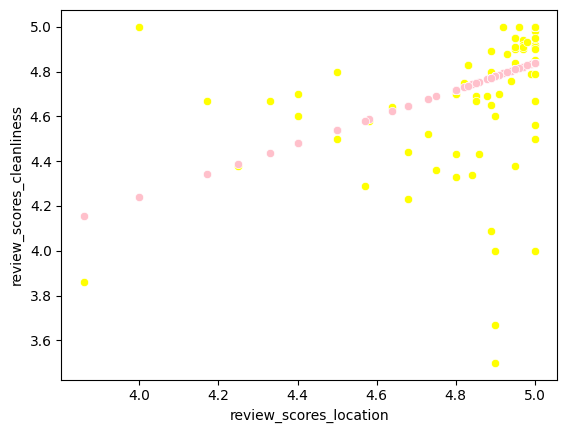

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness', color="yellow", data=hotel)
sns.scatterplot(x='review_scores_location', y='Predicciones4', color="pink", data=hotel)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.1813199356585351
Coeficiente de correlación:  0.42581678649218974


##**“availability_365 vs number_of_reviews”**

In [ ]:
hotel = hotel.astype({"availability_365": int, "number_of_reviews": int})

<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

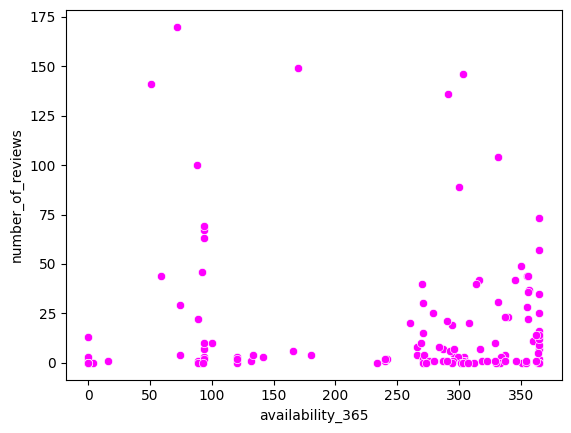

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='availability_365', y='number_of_reviews',color="magenta",data=hotel)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= hotel[['availability_365']]
Var_Dep= hotel['number_of_reviews']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.01860611]),
 'rank_': 1,
 'singular_': array([1318.27975476]),
 'intercept_': 24.341505859776653}

MODELO MATEMATICO y= -0.01860611x + 24.341505859776653

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.004185937207705326

In [ ]:
#Predecimos los valores de total 
y_pred= model.predict(X=hotel[['availability_365']])
y_pred

array([18.01542845, 18.16427733, 17.82936735, 17.71773069, 19.00155228,
       24.0438081 , 17.5502757 , 17.7363368 , 22.96465372, 17.5502757 ,
       17.69912458, 17.5502757 , 17.5502757 , 19.05737061, 18.68524841,
       18.6666423 , 18.46197509, 18.16427733, 18.07124678, 17.7363368 ,
       17.5502757 , 17.64330625, 18.92712784, 22.68556207, 18.75967285,
       17.5502757 , 17.5502757 , 17.5502757 , 17.5502757 , 17.5502757 ,
       18.70385452, 24.34150586, 23.00186594, 22.96465372, 23.24374537,
       17.71773069, 18.07124678, 17.56888181, 17.5502757 , 22.48089486,
       18.22009566, 23.39259425, 18.70385452, 17.71773069, 18.8527034 ,
       19.00155228, 19.39228059, 18.88991562, 18.83409729, 19.39228059,
       21.71804434, 19.33646226, 19.29925004, 24.34150586, 18.77827896,
       19.29925004, 21.17846715, 18.12706511, 17.60609403, 18.44336898,
       19.15040116, 22.59253152, 22.59253152, 17.5502757 , 22.68556207,
       22.59253152, 22.59253152, 22.62974374, 19.29925004, 22.70

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
hotel.insert(0, 'Predicciones5', y_pred)
hotel.head()

,Predicciones5,Predicciones6,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,id,scrape_id,host_id,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
14,18.015428,4.831038,4.737500,17.940253,2459.809641,95.658954,14.0,737328,20230329041210,3850198,...,Room in serviced apartment,Hotel room,1 bath,"[""Smoke alarm"", ""Luggage dropoff allowed"", ""Lo...",1006.0,t,2023-03-29,2013-01-05,2022-03-20,t
53,18.164277,4.830314,4.821550,17.940253,2459.809641,95.658954,53.0,865012,20230329041210,3850198,...,Room in serviced apartment,Hotel room,1 bath,"[""Smoke alarm"", ""TV with standard cable"", ""Hos...",1006.0,t,2023-03-29,2013-03-02,2022-01-01,t
55,17.829367,4.828141,4.839561,17.940253,2459.809641,95.658954,55.0,868843,20230329041210,3850198,...,Room in serviced apartment,Hotel room,1 bath,"[""Smoke alarm"", ""Luggage dropoff allowed"", ""Lo...",908.0,t,2023-03-30,2014-08-03,2023-03-22,t
62,17.717731,4.830314,4.809543,17.940253,2459.809641,95.658954,62.0,869063,20230329041210,3850198,...,Room in serviced apartment,Hotel room,1 bath,"[""Smoke alarm"", ""Luggage dropoff allowed"", ""Lo...",908.0,t,2023-03-30,2016-01-05,2023-01-13,t
66,19.001552,4.832176,4.839561,17.510961,2460.740670,95.445015,66.0,281134,20230329041210,196253,...,Room in serviced apartment,Hotel room,1 private bath,"[""Free street parking"", ""TV with standard cabl...",3162.0,t,2023-03-30,2015-01-05,2019-10-05,t


<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

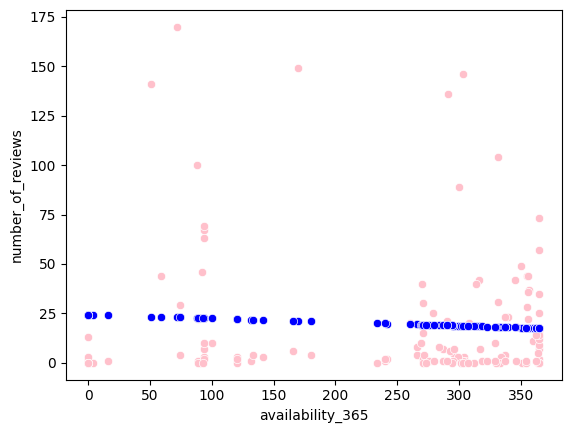

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='availability_365', y='number_of_reviews', color="pink", data=hotel)
sns.scatterplot(x='availability_365', y='Predicciones5', color="blue", data=hotel)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.004185937207705326
Coeficiente de correlación:  0.06469881921415047


##**“reviews_per_month vs review_scores_communication”**

<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

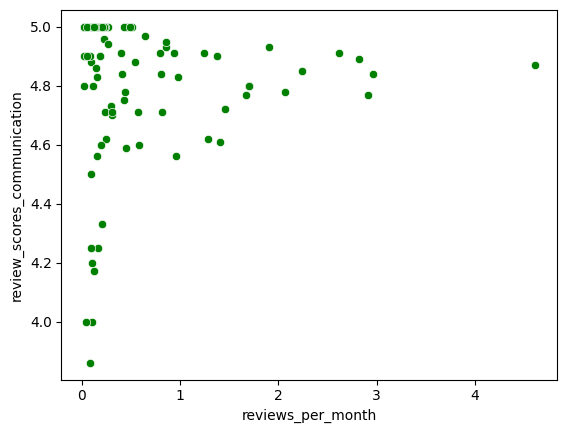

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='reviews_per_month', y='review_scores_communication',color="green",data=hotel)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= hotel[['reviews_per_month']]
Var_Dep= hotel['review_scores_communication']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.01034783]),
 'rank_': 1,
 'singular_': array([9.52981331]),
 'intercept_': 4.832900685900426}

modelo matemático: y= -0.01034783x + 4.832900685900426

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.0015775842088091574

In [ ]:
#Predecimos los valores de total 
y_pred= model.predict(X=hotel[['reviews_per_month']])
y_pred

array([4.83103808, 4.83031373, 4.82814069, 4.83031373, 4.83217634,
       4.83269373, 4.83062416, 4.82876155, 4.83207286, 4.83207286,
       4.82834764, 4.81530938, 4.83259025, 4.83196938, 4.83248677,
       4.83269373, 4.82731286, 4.81323981, 4.82969286, 4.82700242,
       4.81530938, 4.83114156, 4.80972155, 4.83269373, 4.81779286,
       4.83134851, 4.83072764, 4.83083112, 4.83021025, 4.83052069,
       4.83103808, 4.83041721, 4.80227112, 4.7851972 , 4.82462242,
       4.8247259 , 4.83207286, 4.81530938, 4.81530938, 4.8309346 ,
       4.8309346 , 4.80578938, 4.80371981, 4.82296677, 4.8318659 ,
       4.83217634, 4.83124503, 4.83165895, 4.83134851, 4.8318659 ,
       4.83103808, 4.82689895, 4.83269373, 4.83238329, 4.83021025,
       4.82979634, 4.80278851, 4.83196938, 4.83269373, 4.83062416,
       4.82762329, 4.83145199, 4.81872416, 4.82451895, 4.82824416,
       4.81841373, 4.81965547, 4.82317373, 4.83238329, 4.81148068,
       4.81530938, 4.83269373, 4.83176242, 4.81530938, 4.82969

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
hotel.insert(0, 'Predicciones6', y_pred)
hotel.head()

,Predicciones6,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,id,scrape_id,host_id,host_listings_count,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
14,4.831038,4.737500,17.940253,2459.809641,95.658954,14.0,737328,20230329041210,3850198,19.0,...,Room in serviced apartment,Hotel room,1 bath,"[""Smoke alarm"", ""Luggage dropoff allowed"", ""Lo...",1006.0,t,2023-03-29,2013-01-05,2022-03-20,t
53,4.830314,4.821550,17.940253,2459.809641,95.658954,53.0,865012,20230329041210,3850198,19.0,...,Room in serviced apartment,Hotel room,1 bath,"[""Smoke alarm"", ""TV with standard cable"", ""Hos...",1006.0,t,2023-03-29,2013-03-02,2022-01-01,t
55,4.828141,4.839561,17.940253,2459.809641,95.658954,55.0,868843,20230329041210,3850198,19.0,...,Room in serviced apartment,Hotel room,1 bath,"[""Smoke alarm"", ""Luggage dropoff allowed"", ""Lo...",908.0,t,2023-03-30,2014-08-03,2023-03-22,t
62,4.830314,4.809543,17.940253,2459.809641,95.658954,62.0,869063,20230329041210,3850198,19.0,...,Room in serviced apartment,Hotel room,1 bath,"[""Smoke alarm"", ""Luggage dropoff allowed"", ""Lo...",908.0,t,2023-03-30,2016-01-05,2023-01-13,t
66,4.832176,4.839561,17.510961,2460.740670,95.445015,66.0,281134,20230329041210,196253,16.0,...,Room in serviced apartment,Hotel room,1 private bath,"[""Free street parking"", ""TV with standard cabl...",3162.0,t,2023-03-30,2015-01-05,2019-10-05,t


<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

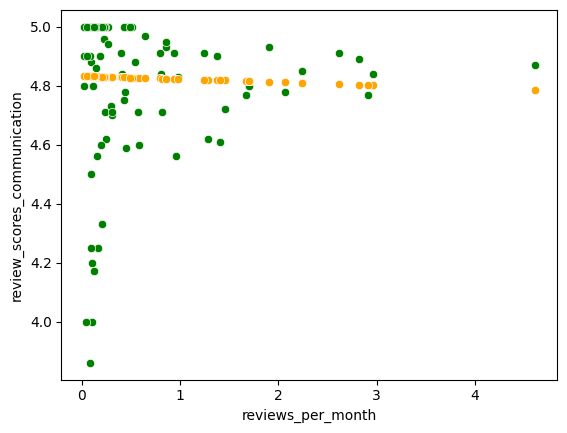

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='reviews_per_month', y='review_scores_communication', color="green", data=hotel)
sns.scatterplot(x='reviews_per_month', y='Predicciones6', color="orange", data=hotel)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.0015775842088091574
Coeficiente de correlación:  0.03971881429258881


In [ ]:
#Graficamos todas las dispersiones entre todas las variables
#sns.pairplot(enthome_apt)

In [ ]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors1_1=hotel.corr()
Corr_Factors1_1

<ipython-input-170-18fd7c093f81>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors1_1=hotel.corr()


,Predicciones6,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,host_id,minimum_nights_avg_ntm,number_of_reviews,number_of_reviews_ltm,...,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,price
Predicciones6,1.000000,0.027590,-0.033472,0.033472,-0.033472,-0.174858,0.016656,-0.163504,-0.506829,-0.522054,...,0.027590,-0.073095,0.080795,0.055123,-0.126126,-0.056433,-1.000000,-0.041741,-0.033472,0.076259
Predicciones4,0.027590,1.000000,0.001794,-0.001794,0.001794,-0.067411,-0.118017,-0.029589,0.119125,0.112171,...,1.000000,0.439981,-0.163861,0.035800,-0.112306,-0.150654,-0.027590,-0.057773,0.001794,0.050064
Predicciones3,-0.033472,0.001794,1.000000,-1.000000,1.000000,-0.001204,0.295599,-0.027003,0.214443,0.176997,...,0.001794,-0.050065,0.068057,-0.009920,-0.153038,0.074080,0.033472,0.301219,1.000000,-0.002691
Predicciones2,0.033472,-0.001794,-1.000000,1.000000,-1.000000,0.001204,-0.295599,0.027003,-0.214443,-0.176997,...,-0.001794,0.050065,-0.068057,0.009920,0.153038,-0.074080,-0.033472,-0.301219,-1.000000,0.002691
Predicciones,-0.033472,0.001794,1.000000,-1.000000,1.000000,-0.001204,0.295599,-0.027003,0.214443,0.176997,...,0.001794,-0.050065,0.068057,-0.009920,-0.153038,0.074080,0.033472,0.301219,1.000000,-0.002691
Unnamed: 0,-0.174858,-0.067411,-0.001204,0.001204,-0.001204,1.000000,0.295165,-0.070748,-0.163493,-0.068189,...,-0.067411,0.066158,-0.228427,-0.264881,-0.182509,0.092183,0.174858,0.108928,-0.001204,-0.185982
host_id,0.016656,-0.118017,0.295599,-0.295599,0.295599,0.295165,1.000000,-0.064676,0.003210,0.007446,...,-0.118017,-0.246713,-0.139839,-0.233145,-0.157811,0.186230,-0.016656,0.201331,0.295599,-0.098280
minimum_nights_avg_ntm,-0.163504,-0.029589,-0.027003,0.027003,-0.027003,-0.070748,-0.064676,1.000000,0.042881,0.036981,...,-0.029589,0.034636,0.022755,0.204183,-0.019906,-0.100969,0.163504,0.050735,-0.027003,0.020376
number_of_reviews,-0.506829,0.119125,0.214443,-0.214443,0.214443,-0.163493,0.003210,0.042881,1.000000,0.896208,...,0.119125,0.109784,-0.013824,0.085781,-0.034472,0.110297,0.506829,0.079756,0.214443,-0.080934
number_of_reviews_ltm,-0.522054,0.112171,0.176997,-0.176997,0.176997,-0.068189,0.007446,0.036981,0.896208,1.000000,...,0.112171,0.109063,-0.095655,0.033255,-0.050483,0.030780,0.522054,0.091723,0.176997,-0.097388


In [ ]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors11= abs(Corr_Factors1_1)
Corr_Factors11

,Predicciones6,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,host_id,minimum_nights_avg_ntm,number_of_reviews,number_of_reviews_ltm,...,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,price
Predicciones6,1.000000,0.027590,0.033472,0.033472,0.033472,0.174858,0.016656,0.163504,0.506829,0.522054,...,0.027590,0.073095,0.080795,0.055123,0.126126,0.056433,1.000000,0.041741,0.033472,0.076259
Predicciones4,0.027590,1.000000,0.001794,0.001794,0.001794,0.067411,0.118017,0.029589,0.119125,0.112171,...,1.000000,0.439981,0.163861,0.035800,0.112306,0.150654,0.027590,0.057773,0.001794,0.050064
Predicciones3,0.033472,0.001794,1.000000,1.000000,1.000000,0.001204,0.295599,0.027003,0.214443,0.176997,...,0.001794,0.050065,0.068057,0.009920,0.153038,0.074080,0.033472,0.301219,1.000000,0.002691
Predicciones2,0.033472,0.001794,1.000000,1.000000,1.000000,0.001204,0.295599,0.027003,0.214443,0.176997,...,0.001794,0.050065,0.068057,0.009920,0.153038,0.074080,0.033472,0.301219,1.000000,0.002691
Predicciones,0.033472,0.001794,1.000000,1.000000,1.000000,0.001204,0.295599,0.027003,0.214443,0.176997,...,0.001794,0.050065,0.068057,0.009920,0.153038,0.074080,0.033472,0.301219,1.000000,0.002691
Unnamed: 0,0.174858,0.067411,0.001204,0.001204,0.001204,1.000000,0.295165,0.070748,0.163493,0.068189,...,0.067411,0.066158,0.228427,0.264881,0.182509,0.092183,0.174858,0.108928,0.001204,0.185982
host_id,0.016656,0.118017,0.295599,0.295599,0.295599,0.295165,1.000000,0.064676,0.003210,0.007446,...,0.118017,0.246713,0.139839,0.233145,0.157811,0.186230,0.016656,0.201331,0.295599,0.098280
minimum_nights_avg_ntm,0.163504,0.029589,0.027003,0.027003,0.027003,0.070748,0.064676,1.000000,0.042881,0.036981,...,0.029589,0.034636,0.022755,0.204183,0.019906,0.100969,0.163504,0.050735,0.027003,0.020376
number_of_reviews,0.506829,0.119125,0.214443,0.214443,0.214443,0.163493,0.003210,0.042881,1.000000,0.896208,...,0.119125,0.109784,0.013824,0.085781,0.034472,0.110297,0.506829,0.079756,0.214443,0.080934
number_of_reviews_ltm,0.522054,0.112171,0.176997,0.176997,0.176997,0.068189,0.007446,0.036981,0.896208,1.000000,...,0.112171,0.109063,0.095655,0.033255,0.050483,0.030780,0.522054,0.091723,0.176997,0.097388


<Axes: >

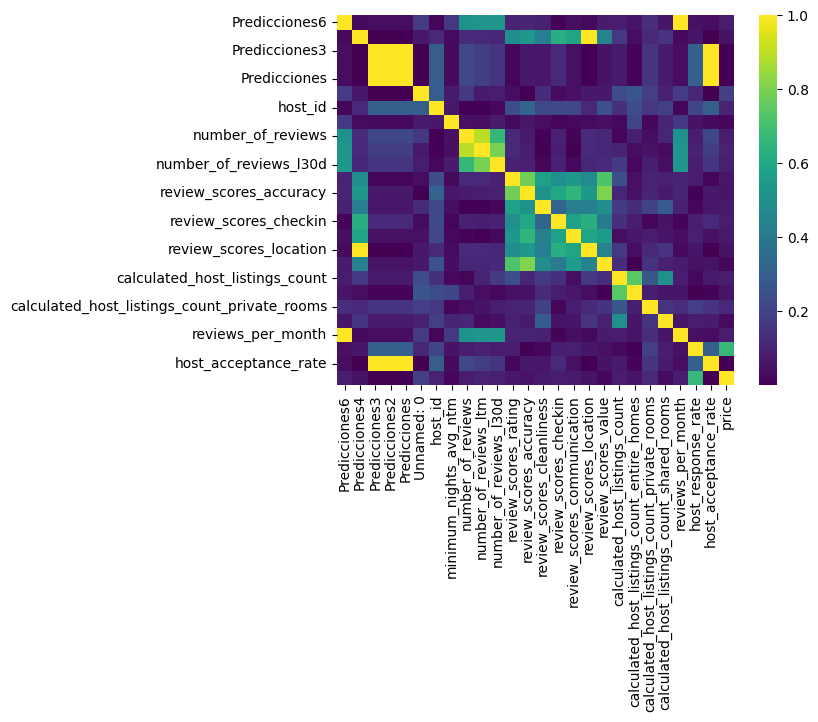

In [ ]:
#Graficamos el mapa de calor de los coeficientes de correlación 
Heat_Map1= sns.heatmap(Corr_Factors11, cmap = 'viridis')  
Heat_Map1

<Axes: >

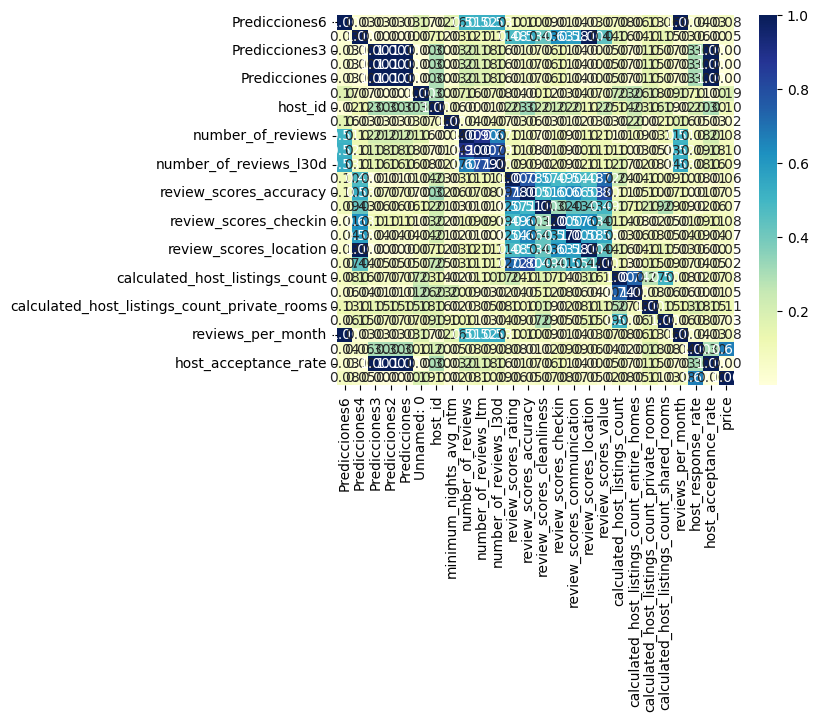

In [ ]:
#Ajustamos el mapa de calor de los coeficientes de correlación 
Heat_Map2= sns.heatmap(Corr_Factors11, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map2